Initial polygons:


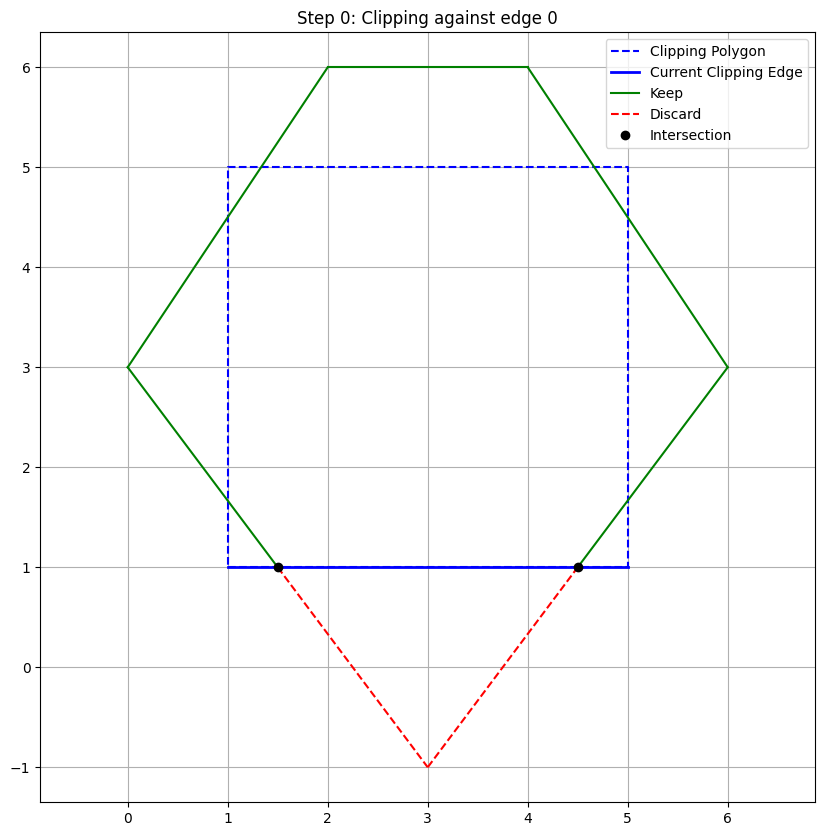


Clipping against edge 0:


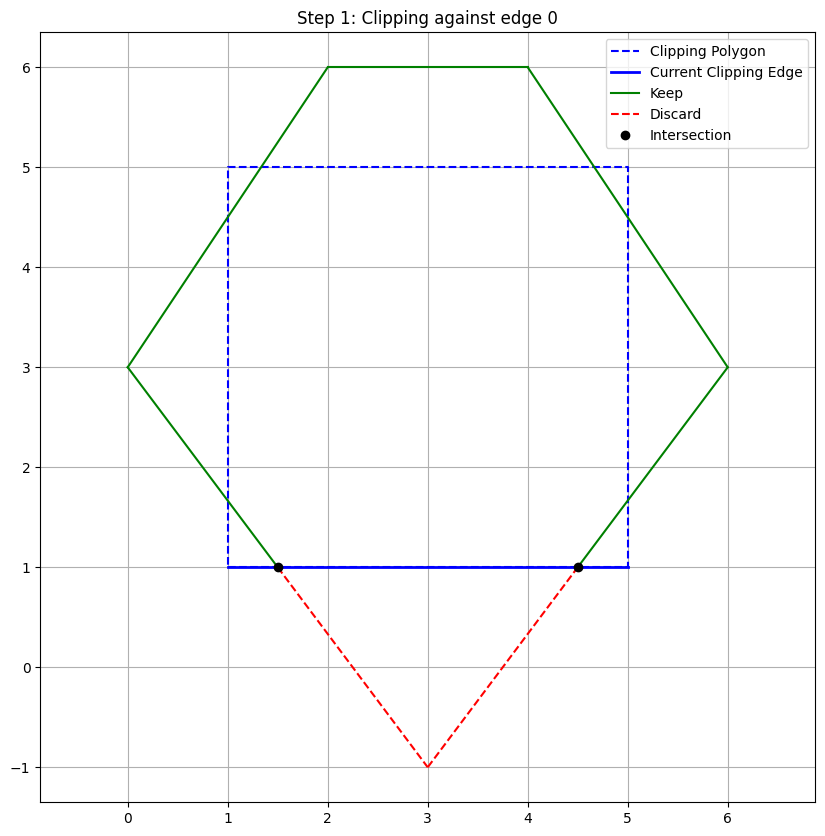


Clipping against edge 1:


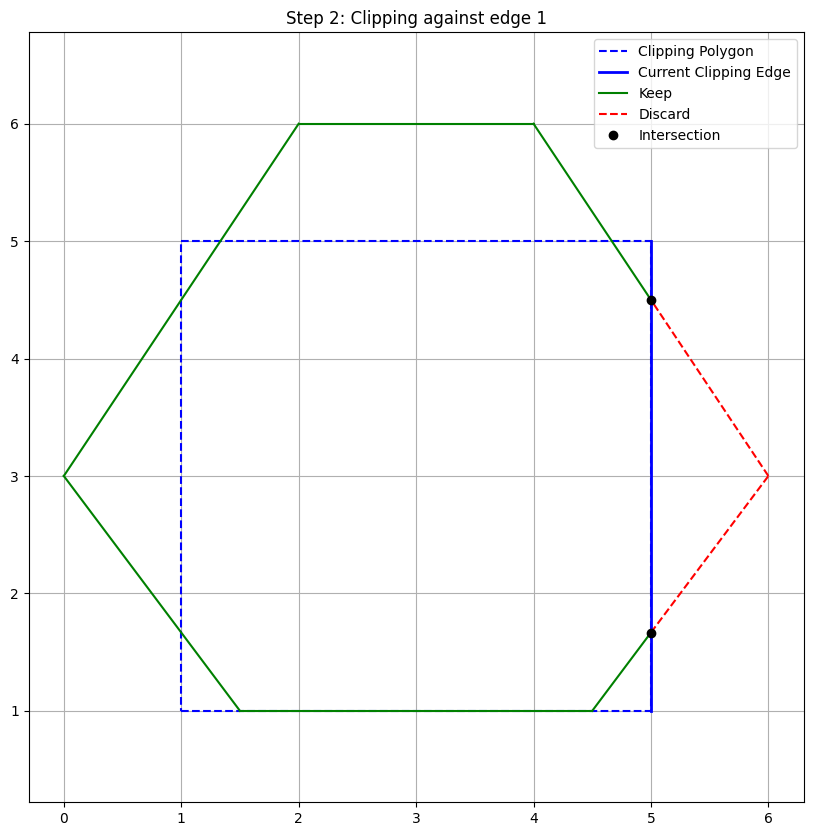


Clipping against edge 2:


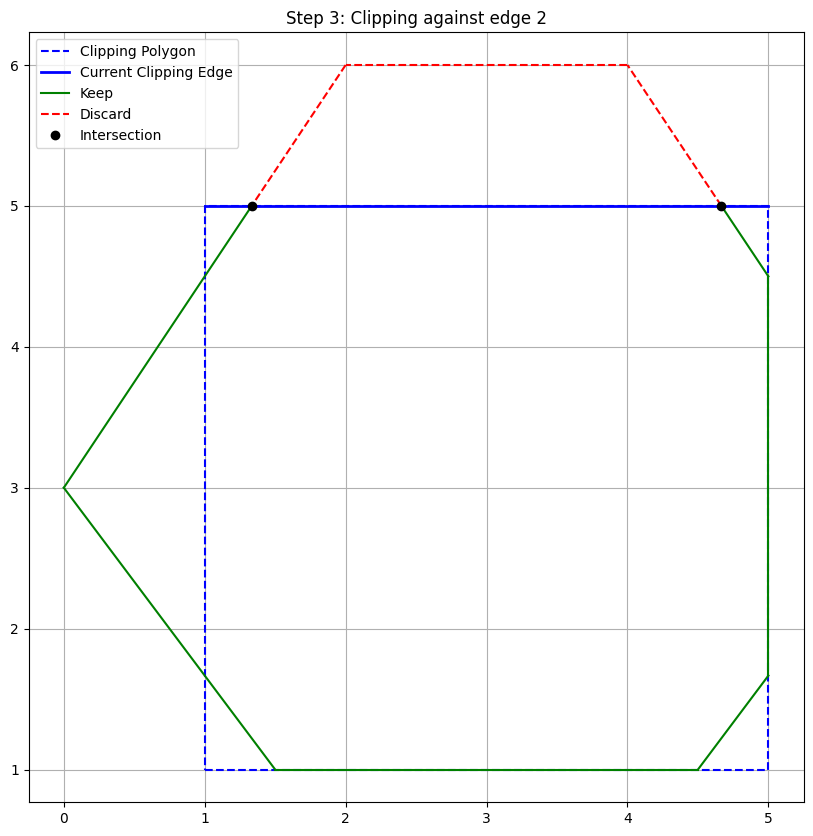


Clipping against edge 3:


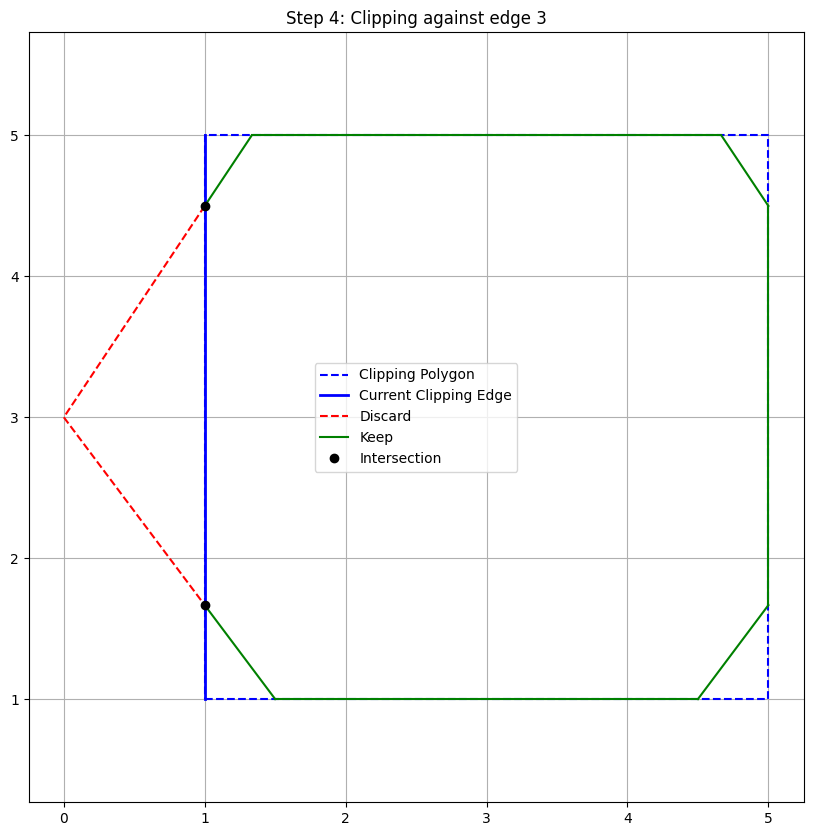


Final result:


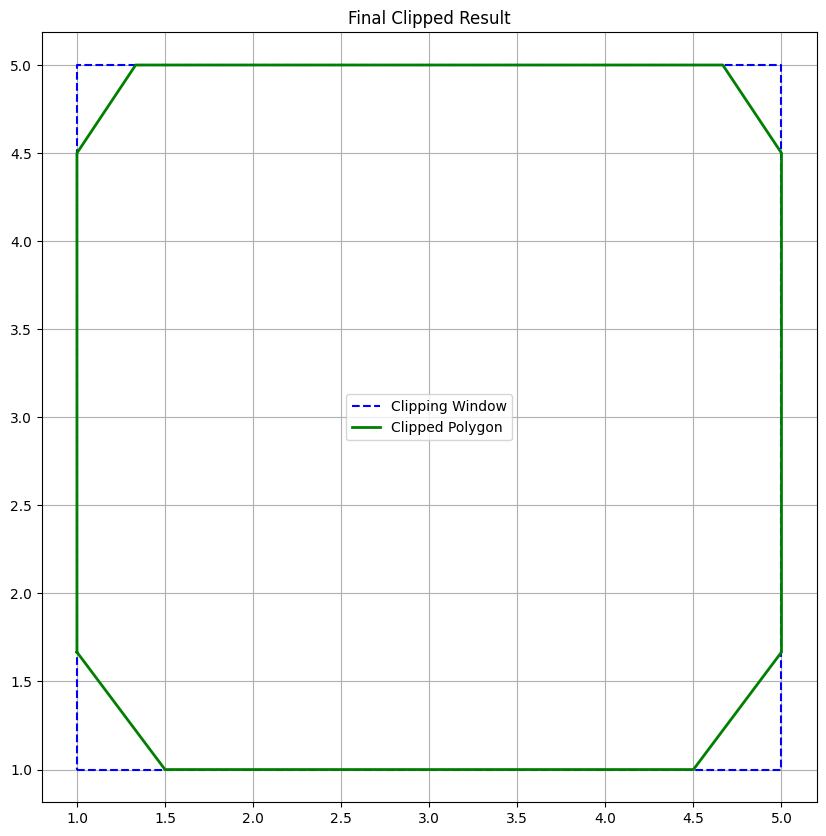


Final clipped polygon vertices: [(1.0, 1.6666666666666667), (1.5, 1.0), (4.5, 1.0), (5.0, 1.6666666666666665), (5.0, 4.5), (4.666666666666667, 5.0), (1.3333333333333335, 5.0), (1.0, 4.5)]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def orientation_test(edge_start, edge_end, point):
    """Determines if a point is to the left or right of an edge."""
    x1, y1 = edge_start
    x2, y2 = edge_end
    x, y = point
    return (x2 - x1) * (y - y1) - (y2 - y1) * (x - x1)

In [ ]:
def clip_polygon_with_visualization(subject_polygon, clipping_polygon):
    """Clips a polygon against another polygon with step-by-step visualization."""
    output_polygon = subject_polygon
    
    print("Initial polygons:")
    visualize_clipping_step(subject_polygon, clipping_polygon, 0, 0)
    
    for i in range(len(clipping_polygon)):
        print(f"\nClipping against edge {i}:")
        output_polygon = visualize_clipping_step(output_polygon, clipping_polygon, i, i+1)
        
        if not output_polygon:
            print("Polygon completely clipped away")
            return []
    
    print("\nFinal result:")
    visualize_final_result(output_polygon, clipping_polygon)
    return output_polygon

In [ ]:
def visualize_final_result(clipped_polygon, clipping_polygon):
    """Visualizes the final clipped polygon result."""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot clipping polygon
    clip_x = [v[0] for v in clipping_polygon + [clipping_polygon[0]]]
    clip_y = [v[1] for v in clipping_polygon + [clipping_polygon[0]]]
    ax.plot(clip_x, clip_y, 'b--', label='Clipping Window')
    
    # Plot final clipped polygon
    if clipped_polygon:
        result_x = [v[0] for v in clipped_polygon + [clipped_polygon[0]]]
        result_y = [v[1] for v in clipped_polygon + [clipped_polygon[0]]]
        ax.plot(result_x, result_y, 'g-', linewidth=2, label='Clipped Polygon')
    
    # Set plot properties
    ax.set_title('Final Clipped Result')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    
    plt.show()

In [ ]:
def clip_polygon_against_edge(polygon_vertices, edge_start, edge_end, ax=None):
    """Clips a polygon against a single edge with visualization."""
    output_vertices = []
    
    for i in range(len(polygon_vertices)):
        current_vertex = polygon_vertices[i]
        previous_vertex = polygon_vertices[i-1]
        
        current_side = orientation_test(edge_start, edge_end, current_vertex)
        previous_side = orientation_test(edge_start, edge_end, previous_vertex)
        
        # Case A: Both vertices are to the left of the edge
        if current_side >= 0 and previous_side >= 0:
            output_vertices.append(current_vertex)
            if ax:
                ax.plot([previous_vertex[0], current_vertex[0]], 
                       [previous_vertex[1], current_vertex[1]], 'g-', label='Keep')
        
        # Case B: Both vertices are to the right of the edge
        elif current_side < 0 and previous_side < 0:
            if ax:
                ax.plot([previous_vertex[0], current_vertex[0]], 
                       [previous_vertex[1], current_vertex[1]], 'r--', label='Discard')
            continue
        
        # Case C: Previous vertex is left, current vertex is right
        elif previous_side >= 0 and current_side < 0:
            intersection = line_intersection(previous_vertex, current_vertex, edge_start, edge_end)
            if intersection:
                output_vertices.append(intersection)
                if ax:
                    ax.plot([previous_vertex[0], intersection[0]], 
                           [previous_vertex[1], intersection[1]], 'g-', label='Keep')
                    ax.plot([intersection[0], current_vertex[0]], 
                           [intersection[1], current_vertex[1]], 'r--', label='Discard')
                    ax.plot(intersection[0], intersection[1], 'ko', label='Intersection')
        
        # Case D: Previous vertex is right, current vertex is left
        elif previous_side < 0 and current_side >= 0:
            intersection = line_intersection(previous_vertex, current_vertex, edge_start, edge_end)
            if intersection:
                output_vertices.append(intersection)
                output_vertices.append(current_vertex)
                if ax:
                    ax.plot([previous_vertex[0], intersection[0]], 
                           [previous_vertex[1], intersection[1]], 'r--', label='Discard')
                    ax.plot([intersection[0], current_vertex[0]], 
                           [intersection[1], current_vertex[1]], 'g-', label='Keep')
                    ax.plot(intersection[0], intersection[1], 'ko', label='Intersection')
    
    return output_vertices


In [ ]:
def line_intersection(line1_start, line1_end, line2_start, line2_end):
    """Calculates intersection point of two line segments."""
    x1, y1 = line1_start
    x2, y2 = line1_end
    x3, y3 = line2_start
    x4, y4 = line2_end
    
    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denominator == 0:
        return None
    
    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denominator
    x = x1 + t * (x2 - x1)
    y = y1 + t * (y2 - y1)
    return (x, y)

In [ ]:
def visualize_clipping_step(subject_polygon, clipping_polygon, edge_index, step_number):
    """Visualizes a single step of the clipping process."""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot clipping polygon
    clip_x = [v[0] for v in clipping_polygon + [clipping_polygon[0]]]
    clip_y = [v[1] for v in clipping_polygon + [clipping_polygon[0]]]
    ax.plot(clip_x, clip_y, 'b--', label='Clipping Polygon')
    
    # Highlight current clipping edge
    edge_start = clipping_polygon[edge_index]
    edge_end = clipping_polygon[(edge_index + 1) % len(clipping_polygon)]
    ax.plot([edge_start[0], edge_end[0]], [edge_start[1], edge_end[1]], 
            'b-', linewidth=2, label='Current Clipping Edge')
    
    # Clip against current edge and visualize
    clipped = clip_polygon_against_edge(subject_polygon, edge_start, edge_end, ax)
    
    # Set plot properties
    ax.set_title(f'Step {step_number}: Clipping against edge {edge_index}')
    ax.grid(True)
    ax.axis('equal')
    
    # Remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()
    return clipped